In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/dataset/final_experiment_avg_df.csv')


def create_tables_by_velocity_position(df):
    tables = {}
    unique_velocities = df['velocity'].unique()
    unique_positions = df['position'].unique()

    print(unique_velocities)
    print(unique_positions)
    
    for velocity in unique_velocities:
        for position in unique_positions:
            # Filter the DataFrame based on the current combination of velocity and position
            filtered_df = df[(df['velocity'] == int(velocity)) & (df['position'] == int(position))]
            
            # Create a dynamic name for the DataFrame based on velocity and position
            table_name = f"df_{int(velocity)}_{int(position)}"
            tables[table_name] = filtered_df
    
    return tables

tables_dict = create_tables_by_velocity_position(df)
print(tables_dict)
def calculate_smoothed_displacement(df, window_size=5):
    df['smoothed_displacement'] = df['displacement'].rolling(window=window_size, center=True).mean()
    # Set the first and last values as per previous conditions
    if len(df) > 1:
        first_value = df['displacement'].iloc[0]
        connect_value = df['smoothed_displacement'].iloc[window_size]
        linear_interp_start = np.linspace(first_value, connect_value, num=window_size)
        df['smoothed_displacement'].iloc[:window_size] = linear_interp_start

        # Last section: Linearly connect from the smoothed value before window_size to the last value
        last_value = df['displacement'].iloc[-1]
        connect_value_end = df['smoothed_displacement'].iloc[-(window_size + 1)]
        linear_interp_end = np.linspace(connect_value_end, last_value, num=window_size)
        df['smoothed_displacement'].iloc[-window_size:] = linear_interp_end
    return df

# df_160_r_2 = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == 2)]
# df_160_r_2['smoothed_displacement'] = df_160_r_2.apply(calculate_smoothed_displacement, axis=1)

# Apply smoothing to each table in tables_dict and store results
for table_name, table_df in tables_dict.items():
    # Apply the smoothing function
    tables_dict[table_name] = calculate_smoothed_displacement(table_df, 5)

# Combine all tables back into a single DataFrame based on 'id'
combined_df = pd.concat(tables_dict.values(), ignore_index=True)

# Sort the combined DataFrame by 'id' to maintain order if needed
combined_df = combined_df.sort_values(by='id').reset_index(drop=True)

average_df = (
    combined_df.groupby(['velocity', 'Cycle_Number'])
    .agg({
        'Period': 'mean',
        'experiment_number': 'mean',
        'position': 'mean',  # Assuming it's numerical (like 1 for right, 0 for left)
        'displacement': 'mean',
        'smoothed_displacement': 'mean'
    })
    .reset_index()
)

average_df


[160. 210. 270. 320. 360. 380.]
[0. 1.]
{'df_160_0':       id  velocity       Period  Cycle_Number  experiment_number  position  \
0      0     160.0    300.65650       1772.25                4.5       0.0   
1      1     160.0    601.11325       3009.75                4.5       0.0   
2      2     160.0    901.65225       4246.75                4.5       0.0   
3      3     160.0   1202.14075       5483.50                4.5       0.0   
4      4     160.0   1502.75775       6721.00                4.5       0.0   
..   ...       ...          ...           ...                ...       ...   
156  156     160.0  47182.42950     194768.75                4.5       0.0   
157  157     160.0  47482.93375     196004.00                4.5       0.0   
158  158     160.0  47783.59375     197242.75                4.5       0.0   
159  159     160.0  48084.02750     198479.50                4.5       0.0   
160  160     160.0  48384.71475     199717.25                4.5       0.0   

     displ

C:\Users\alira\AppData\Local\Temp\ipykernel_29604\2281149863.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_displacement'] = df['displacement'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_29604\2281149863.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame

,velocity,Cycle_Number,Period,experiment_number,position,displacement,smoothed_displacement
0,160.0,1772.25,300.65650,4.5,0.5,0.000200,0.000200
1,160.0,3009.75,601.11325,4.5,0.5,0.000201,0.000199
2,160.0,4246.75,901.65225,4.5,0.5,0.000195,0.000198
3,160.0,5483.50,1202.14075,4.5,0.5,0.000196,0.000197
4,160.0,6721.00,1502.75775,4.5,0.5,0.000197,0.000196
...,...,...,...,...,...,...,...
593,380.0,188809.50,19230.41400,6.5,0.5,0.000258,0.000261
594,380.0,191746.00,19530.91400,6.5,0.5,0.000264,0.000260
595,380.0,194684.50,19831.52350,6.5,0.5,0.000261,0.000260
596,380.0,197626.00,20132.34350,6.5,0.5,0.000256,0.000260


In [4]:
average_df["velocity"].unique()

array([160., 210., 270., 320., 360., 380.])

In [8]:
average_df[average_df["velocity"] == 380]

,velocity,Cycle_Number,Period,experiment_number,position,displacement,smoothed_displacement
530,380.0,3729.0,300.4845,6.5,0.5,0.000242,0.000242
531,380.0,6666.5,600.8905,6.5,0.5,0.000243,0.000242
532,380.0,9604.5,901.6170,6.5,0.5,0.000241,0.000243
533,380.0,12546.5,1202.3670,6.5,0.5,0.000243,0.000244
534,380.0,15485.5,1502.9845,6.5,0.5,0.000247,0.000244
...,...,...,...,...,...,...,...
593,380.0,188809.5,19230.4140,6.5,0.5,0.000258,0.000261
594,380.0,191746.0,19530.9140,6.5,0.5,0.000264,0.000260
595,380.0,194684.5,19831.5235,6.5,0.5,0.000261,0.000260
596,380.0,197626.0,20132.3435,6.5,0.5,0.000256,0.000260


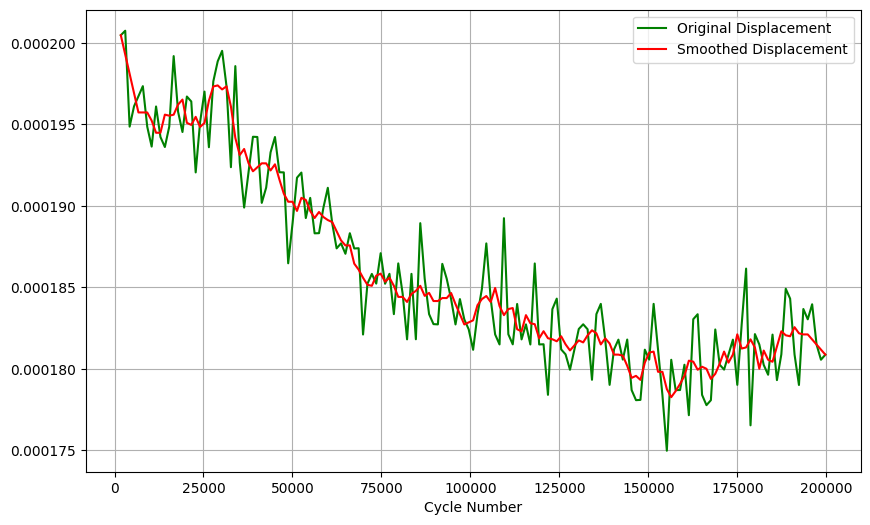

In [3]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on position and velocity, and plot
df = average_df[average_df['velocity'] == 160]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['displacement'], label='Original Displacement', color='green')
plt.plot(df['Cycle_Number'], df['smoothed_displacement'], label='Smoothed Displacement', color='red')
plt.xlabel("Cycle Number")
plt.legend()
plt.grid()
plt.show()

In [15]:
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    # Generate cycle numbers for the prediction
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    # Predict settlement
    predicted_settlement = model.predict(new_data)

    # Filter ground truth data for the specified cycle range and velocity
    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    # Plot predicted settlement
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_settlement, label='Predicted displacement', color='blue', marker='')
    
    # Plot real settlement (ground truth)
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['displacement'], 
             label='Real displacement', color='green', marker='')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('displacement')
    plt.title(f'displacement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Random Forest

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
198 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\U

Best Model Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score (cross-validated): 1.0000
Test Score: 1.0000
R2 Score on Validation Set: 0.9996
R2 Score on Test Set: 0.9959


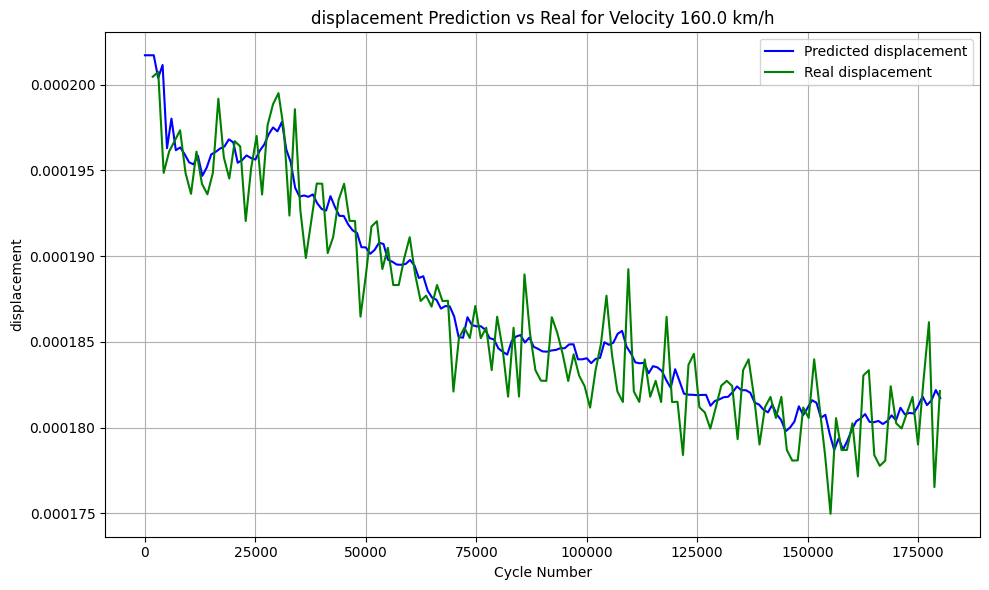

In [19]:
generate_and_plot_displacement(best_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=160.0)

# Light GBM

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\si

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 2
[LightGBM] [Info] Start training from score 0.000219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

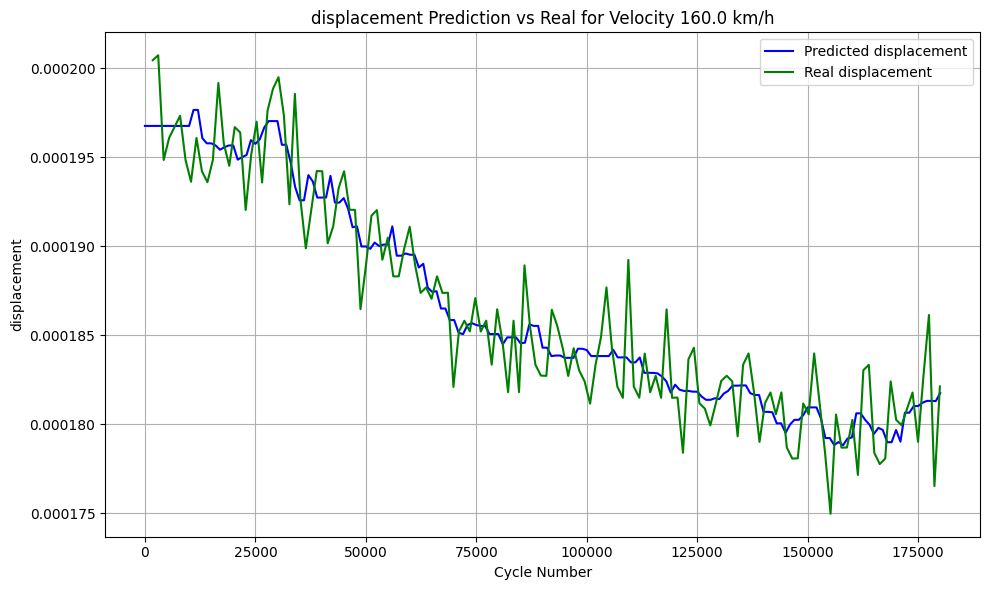

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import lightgbm as lgb
import numpy as np

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the LightGBM model and hyperparameters to tune
model = lgb.LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10],  # -1 means no limit for max_depth
    'learning_rate': [0.2],
    'num_leaves': [31],
    'subsample': [0.4, 0.6],
    'colsample_bytree': [1.0, 1.2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_lgb, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_lgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_lgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")

from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

generate_and_plot_displacement(best_model_lgb, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=160.0)

# XGB

In [26]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [20, 50],            # Number of trees
    'max_depth': [3, 5, 7],                    # Maximum depth of each tree
    'learning_rate': [0.05, 0.01, 0.1],          # Step size shrinkage
    'subsample': [0.2, 0.6, 0.8],               # Fraction of samples for training
    'colsample_bytree': [0.4, 0.6],        # Fraction of features for each tree
    'min_child_weight': [1],              # Minimum sum of instance weights in a child
    'reg_alpha': [0.1, 1.0],              # L1 regularization (lasso)
    'reg_lambda': [0.1, 1.0]              # L2 regularization (ridge)
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',            # Use R-squared as the evaluation metric
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Display progress
    n_jobs=-1                # Use all available CPU cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_xgb_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 20, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.2}
Test MAE: 0.0000
Test MSE: 0.0000
Test R-squared Score: -0.0171


# SVR

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('svr', SVR())  # SVR model (kernel can be tuned in GridSearchCV)
])

# Define the parameter grid for SVR
param_grid = {
    'svr__kernel': ['rbf', 'linear', 'poly'],  # Explore different kernels
    'svr__C': [0.1, 1.0, 10, 100],            # Regularization parameter
    'svr__epsilon': [0.01, 0.1, 0.5, 1.0],    # Tolerance margin
    'svr__gamma': ['scale', 'auto']           # Kernel coefficient (for rbf/poly kernels)
}

# Set up GridSearchCV with R-squared as the scoring metric
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',  # Use R-squared as the evaluation metric
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Use all available CPU cores
    verbose=2      # Display progress
)

# Run the grid search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared Score: {r2:.4f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 1.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Test R-squared Score: -0.2180


# Linear Regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Parameters: {'alpha': 100}
Ridge Test R-squared Score: 0.7363
Best Lasso Parameters: {'alpha': 1}
Lasso Test R-squared Score: -0.0171


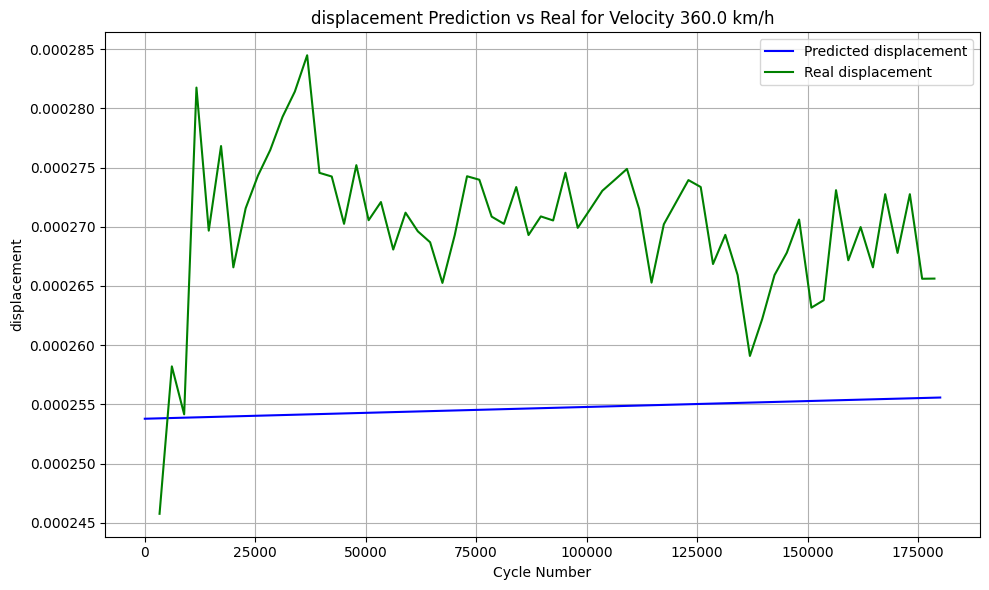

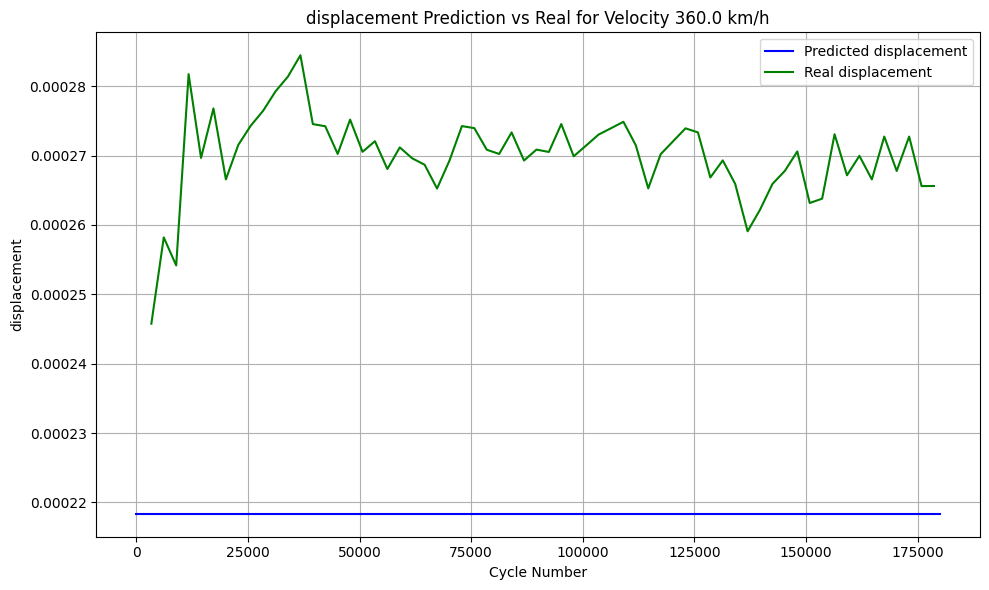

In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define models for Ridge and Lasso
ridge_model = Ridge()
lasso_model = Lasso()

# Define hyperparameter grids
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Ridge Regression Grid Search
ridge_grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='r2',  # Use R² as the scoring metric
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)
ridge_grid_search.fit(X_train_val, y_train_val)
best_ridge_model = ridge_grid_search.best_estimator_

# Lasso Regression Grid Search
lasso_grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)
lasso_grid_search.fit(X_train_val, y_train_val)
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate the best Ridge model on the test set
y_test_pred_ridge = best_ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_test_pred_ridge)
print(f"Best Ridge Parameters: {ridge_grid_search.best_params_}")
print(f"Ridge Test R-squared Score: {ridge_r2:.4f}")

# Evaluate the best Lasso model on the test set
y_test_pred_lasso = best_lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_test_pred_lasso)
print(f"Best Lasso Parameters: {lasso_grid_search.best_params_}")
print(f"Lasso Test R-squared Score: {lasso_r2:.4f}")

generate_and_plot_displacement(best_ridge_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)

generate_and_plot_displacement(best_lasso_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


# MLP

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.2, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbfgs'}
Test MAE: 0.0000
Test MSE: 0.0000
Test R-squared Score: -0.5225


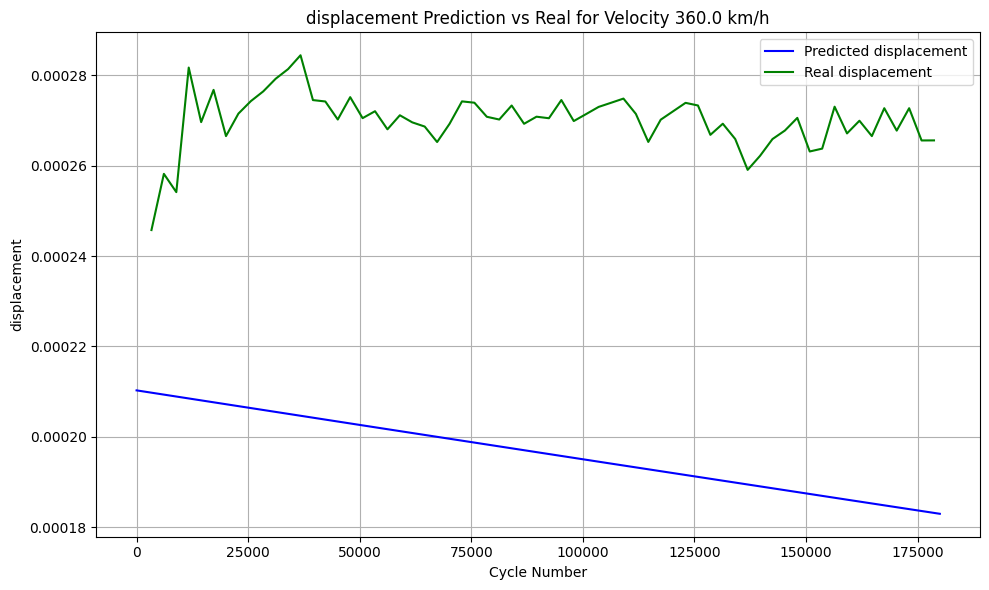

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('mlp', MLPRegressor(max_iter=2000, random_state=42))  # MLP Regressor
])

# Define the hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128, 64), (256, 128, 64)],  # Varying layer architectures
    'mlp__activation': ['relu', 'tanh'],                           # Activation functions
    'mlp__alpha': [0.01, 0.1, 0.2],                              # L2 regularization (alpha)
    'mlp__solver': ['adam', 'lbfgs'],                              # Optimizers
    'mlp__learning_rate': ['constant', 'adaptive'],                # Learning rate schedule
}

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Display progress
    n_jobs=-1           # Use all available cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_mlp_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_mlp_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")

generate_and_plot_displacement(best_mlp_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.2, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbfgs'}
Test MAE: 0.0000
Test MSE: 0.0000
Test R-squared Score: -0.5225


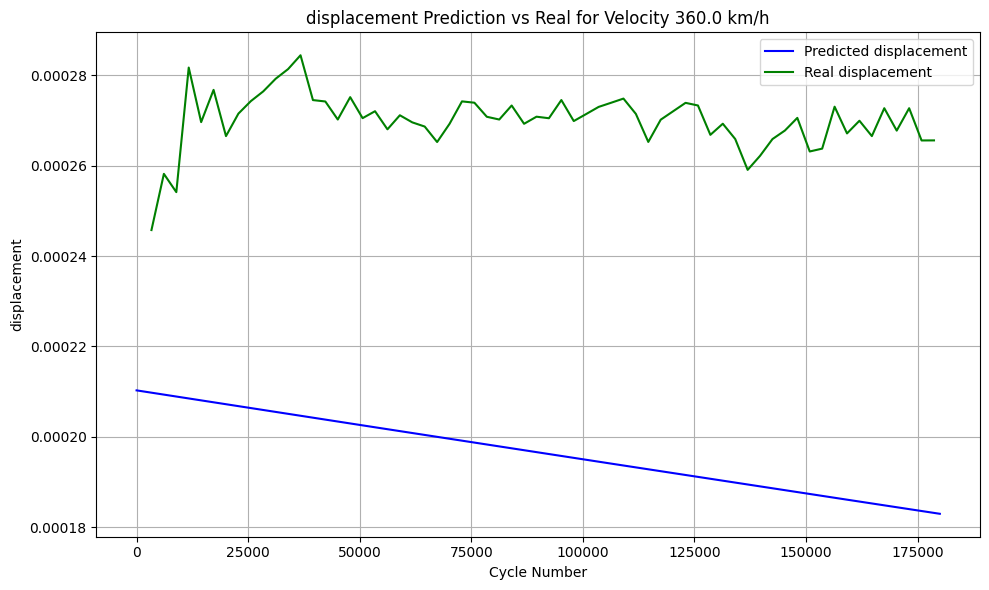

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('mlp', MLPRegressor(max_iter=2000, random_state=42))  # MLP Regressor
])

# Define the hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128, 64), (256, 128, 64)],  # Varying layer architectures
    'mlp__activation': ['relu', 'tanh'],                           # Activation functions
    'mlp__alpha': [0.01, 0.1, 0.2],                              # L2 regularization (alpha)
    'mlp__solver': ['adam', 'lbfgs'],                              # Optimizers
    'mlp__learning_rate': ['constant', 'adaptive'],                # Learning rate schedule
}

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Display progress
    n_jobs=-1           # Use all available cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_mlp_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_mlp_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")

generate_and_plot_displacement(best_mlp_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.2, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbfgs'}
Test MAE: 0.0000
Test MSE: 0.0000
Test R-squared Score: -0.5225


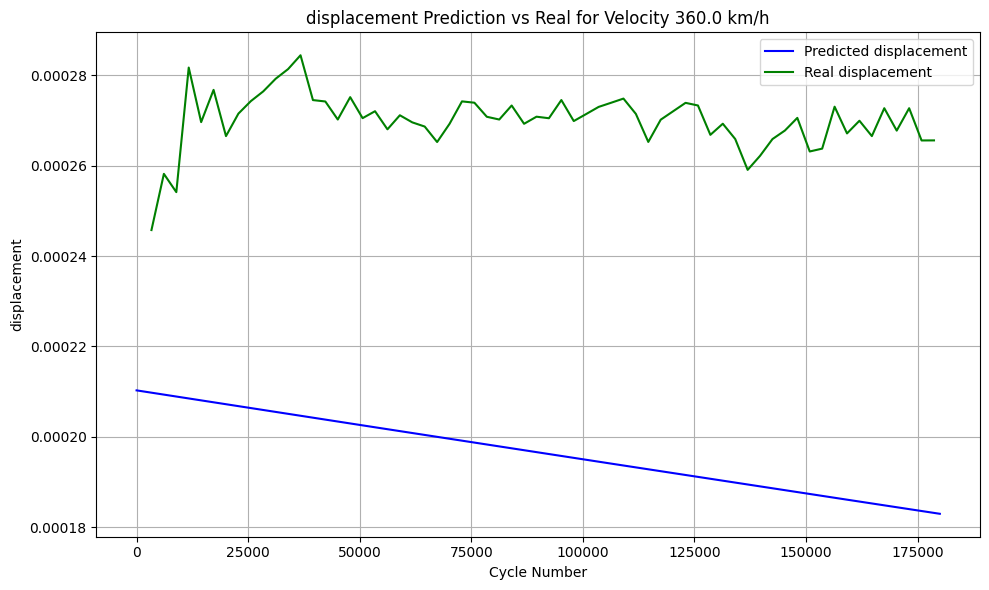

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target
X = average_df[['velocity', 'Cycle_Number']]
y = average_df['smoothed_displacement']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('mlp', MLPRegressor(max_iter=2000, random_state=42))  # MLP Regressor
])

# Define the hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128, 64), (256, 128, 64)],  # Varying layer architectures
    'mlp__activation': ['relu', 'tanh'],                           # Activation functions
    'mlp__alpha': [0.01, 0.1, 0.2],                              # L2 regularization (alpha)
    'mlp__solver': ['adam', 'lbfgs'],                              # Optimizers
    'mlp__learning_rate': ['constant', 'adaptive'],                # Learning rate schedule
}

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Display progress
    n_jobs=-1           # Use all available cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_mlp_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_mlp_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")

generate_and_plot_displacement(best_mlp_model, average_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


In [ ]:
final_df

,velocity,Cycle_Number,K
0,160.0,1772.25,8.522833e+06
1,160.0,3009.75,8.598628e+06
2,160.0,4246.75,8.772985e+06
3,160.0,5483.50,8.786975e+06
4,160.0,6721.00,8.732435e+06
...,...,...,...
593,380.0,188809.50,8.488069e+06
594,380.0,191746.00,8.320175e+06
595,380.0,194684.50,8.512462e+06
596,380.0,197626.00,8.499243e+06
